<a href="https://colab.research.google.com/github/Bolitis3/ml_finance_imperial/blob/main/Programming_Sessions/Programming_Session_5/Programming_Session_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center>Machine Learning and Finance </center>**


## <center> Programming Session 6 - Introduction to Sequence Models - </center>



**Introduction:**

This session aims to explore two fundamental aspects of sequence modeling: a Numpy implementation of a standard Recurrent Neural Network (RNN) and the classification of MNIST digits using Long Short-Term Memory (LSTM) networks.

**Challenge:**

The primary challenge involves grasping the intricacies of sequence modeling techniques, understanding their implementation from scratch, and then applying them to a real-world dataset like MNIST for accurate digit classification. For the Numpy-based RNN, the challenge lies in comprehensively implementing the core functionality of RNNs using only Numpy operations. Meanwhile, for the LSTM-based MNIST classification, the challenge is to understand the complexities of LSTM cells and effectively utilize them to classify handwritten digits.

**Dataset Overview:**

The MNIST dataset, a classic benchmark dataset, consists of 28x28 grayscale images of handwritten digits ranging from 0 to 9. Each image is accompanied by a corresponding label indicating the digit it represents. This dataset serves as an ideal starting point for experimenting with various sequence modeling techniques.

**Objectives:**

1. **Numpy Implementation of Standard RNN:**
   - Understand the architecture and functioning of standard RNNs.
   - Implement a basic RNN using Numpy, focusing on forward propagation.

2. **MNIST Classification Using LSTM:**
   - Explore the concept of Long Short-Term Memory (LSTM) networks.
   - Train and evaluate the LSTM model on the MNIST dataset for accurate digit classification.


# 1. Numpy implementation of a standard RNN

<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1vXVUvFIFDxYo_sdil2QPJWSCwXwZj27f"></center>

In [2]:
# Import basic libraries
import matplotlib.pyplot as plt # for plotting
import numpy as np # for manipulating arrays
import tensorflow as tf # for creating Neural Networks, we will use it to load data
plt.style.use('dark_background') # to adapt the colors to a dark background
from IPython.display import Image # for showing graphs from the lectures

We consider the following hyperparameters:

In [3]:
N = 1000
T = 100
D = 50
d = 20

---
<font color=green>Q1:</font>
<br><font color='green'>
Generate some random data of shape $(N, T, D)$.
</font>

---

In [4]:
A = np.random.rand(N,T,D)

In [5]:
A

array([[[0.43744338, 0.70934578, 0.22480612, ..., 0.98610056,
         0.87579032, 0.93879056],
        [0.53798422, 0.23226188, 0.22531692, ..., 0.22170331,
         0.46067818, 0.11743299],
        [0.03271851, 0.22518739, 0.05919939, ..., 0.00107961,
         0.84079903, 0.0674027 ],
        ...,
        [0.58160651, 0.76656593, 0.05093256, ..., 0.99466038,
         0.35510693, 0.16327322],
        [0.44672192, 0.73976071, 0.7008699 , ..., 0.54480884,
         0.48221978, 0.77243339],
        [0.79431039, 0.61495343, 0.57262165, ..., 0.70613046,
         0.91863758, 0.96937436]],

       [[0.59378014, 0.71251941, 0.6956268 , ..., 0.48554655,
         0.56903453, 0.56730539],
        [0.19042678, 0.69929474, 0.49925485, ..., 0.09640087,
         0.79428632, 0.24509449],
        [0.75714958, 0.41824187, 0.51267354, ..., 0.69631396,
         0.45082554, 0.20369295],
        ...,
        [0.23667244, 0.6406571 , 0.41509445, ..., 0.79626767,
         0.81318639, 0.08284824],
        [0.4

---
<font color=green>Q2:</font>
<br><font color='green'>
Generate some random weights $W_{hh}, W_{xh}, b_h$
</font>

---

In [35]:
W_hh = np.random.randn(d,d)
W_xh = np.random.randn(D,d)
b_h = np.random.randn(d)
A = np.random.rand(N,T,D)

---
<font color=green>Q3:</font>
<br><font color='green'>
Produce the output tensor with a shape of $(N, T, d)$ by generating the sequence $y_1, \dots, y_T$ corresponding to each sequence $x_1, \dots, x_T$.
</font>

---

In [7]:
output = np.zeros((N,T,d))
for i in range (N):
  h_t_minus_one = np.zeros(d)
  X = A[i]
  sequence_H =[]
  for x_t in X:
      h = np.tanh(W_hh.T.dot(h_t_minus_one) + W_xh.T.dot(x_t) + b_h)
      sequence_H.append(h)
      h_t_minus_one = h
  output[i]=np.asarray(sequence_H)


#ma version :

output2 = np.zeros((N,T,d))
for i in range (N):
  h=np.zeros(d)
  for j in range (T):
      h = np.tanh(W_hh.T.dot(h) + W_xh.T.dot(A[i,j]) + b_h)
      output2[i,j]=h

np.mean(output) - np.mean(output2)

np.float64(0.0)

---
<font color=green>Q4:</font>
<br><font color='green'>
Plot the shape of the output:
</font>

---

In [8]:
output.shape

(1000, 100, 20)

# 2. MNIST Classification using LSTMs

<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1KNpBc60u1QCopXygOff0tLkQNkyXuSmr"></center>

We aim to employ the LSTM layer for classifying the MNIST dataset, which consists of images shaped as $(60000, 28, 28)$. Each sample represents an image with dimensions $(28, 28)$. Viewing each image as a sequence, we can interpret it as having a length of $T = 28,$ with each element having a dimension of $D = 28$.

## 2.1 Loading the MNIST dataset

---
<font color=green>Q5:</font>
<br><font color='green'>
Retrieve the MNIST dataset by utilizing the `tf.keras.datasets.mnist.load_data`function.
</font>

---

In [30]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

---
<font color=green>Q6:</font>
<br><font color='green'>
Print the shape of the data.
</font>

---

In [31]:
print(f"X_train : {X_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_test : {y_test.shape}")

X_train : (60000, 28, 28)
y_train : (60000,)
X_test : (10000, 28, 28)
y_test : (10000,)


---
<font color=green>Q7:</font>
<br><font color='green'>
Normalize the feature train and test data by dividing each pixel element by 255.
</font>

---

In [19]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

---
<font color=green>Q8:</font>
<br><font color='green'>
The targets represent categories ranging from 0 to 9. To encode them into a tensor of shape $(N, 10)$, utilize the to_categorical function from `tensorflow.keras.utils` for one-hot encoding.
</font>

---

In [32]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(x=y_train)




(60000, 10)


np.float64(0.1)

---
<font color=green>Q9:</font>
<br><font color='green'>
Build the specified model and train it using gradient descent optimization.</font>

---

<center><img width=“500" src = "https://drive.google.com/uc?export=view&id=1zCyhgITfxptmBzUDQ7-TPKsKugVyjtat"></center>

In [59]:
# Set hyperparameters
T = X_train.shape[1]
D = X_train.shape[2]
d = 32
M = 64
N_epochs = 10



In [67]:
W_hh = np.random.randn(d,d)
W_xh = np.random.randn(D,d)
b_h = np.zeros(d)
A = np.random.rand(N,T,D)

W_out = np.random.randn(d,10)
b_out = np.zeros(10)

output = np.zeros((N,T,d))

def cross_entropy (preds,targets):
  J = -(targets*np.log(preds + 1e-9))/targets.shape[0]
  return (np.sum(J))

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)

#def forward(x,T=T,d=d,W_hh = W_hh,W_xh=W_xh,b_h=b_h, W_out = W_out, b_out = b_out):
#  h = np.zeros((x.shape[0],d))
#  hs = [] # hidden layers
#  for t in range (T):
#    x_t = x[:,t,:]
#    h = np.tanh(h@W_hh + x_t.dot(W_xh) + b_h)
#  logits = h@W_out + b_out
#  return softmax(logits), h


losses = []
x = X_train
for i in range (30):

  h = np.zeros((x.shape[0],d))
  hs = [] # hidden states
  for t in range (T):
    x_t = x[:,t,:]
    h = np.tanh(h@W_hh + x_t.dot(W_xh) + b_h)
    hs.append(h)
  hs = np.stack(hs, axis = 1)
  h_last = hs[:,-1,:]

  logits = h_last@W_out + b_out
  preds = softmax(logits)

  loss = cross_entropy(preds, y_sample)
  losses.append(loss)

  d_logits = (preds - y_sample)/N
  dW_out = h_last.T @ d_logits
  db_out = np.sum(d_logits, axis = 0, keepdims = True)

  # Backward pass: last hidden layer
  dh = d_logits @ W_out.T  # (N, d)
  for t in reversed(range(T)):
      h_t = hs[:, t, :]
      h_prev = hs[:, t-1, :] if t > 0 else np.zeros_like(h_t)
      x_t = X_train[:, t, :]

      dtanh = (1 - h_t ** 2) * dh  # (N, d)
      dW_xh = x_t.T @ dtanh
      dW_hh = h_prev.T @ dtanh
      db_h = np.sum(dtanh, axis=0, keepdims=True)


      # Backprop through time
      dh = dtanh @ W_hh.T  # for next iteration

      # Gradient descent step for recurrent weights (could accumulate for all t, simplified here)
      W_xh -= learning_rate * dW_xh
      W_hh -= learning_rate * dW_hh
      b_h  -= learning_rate * db_h

  W_out -= 0.01*grad_W_out
  b_out -= 0.01*grad_b_out

losses




#for i in range (N):
#  h_t_minus_one = np.zeros(d)
#  X = A[i]
#  sequence_H =[]
#  for x_t in X:
#      h = np.tanh(W_hh.T.dot(h_t_minus_one) + W_xh.T.dot(x_t) + b_h)
#      sequence_H.append(h)
#      h_t_minus_one = h
#  output[i]=np.asarray(sequence_H)



ValueError: operands could not be broadcast together with shapes (240,10) (60000,10) 

In [40]:
# Import Modules
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, LSTM, Dense

In [42]:
model = Sequential()
model.add(LSTM(d, return_sequences=False,input_shape = (T,D)))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history = model.fit(X_train,y_train,
                    batch_size = M,
                    epochs = N_epochs,
                    validation_split = 0.3)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 32)             │         7,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,138 (31.79 KB)

 Trainable params: 8,138 (31.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.4384 - loss: 1.6645 - val_accuracy: 0.7602 - val_loss: 0.7246
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.7706 - loss: 0.6794 - val_accuracy: 0.8146 - val_loss: 0.5459
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8191 - loss: 0.5381 - val_accuracy: 0.8364 - val_loss: 0.4817
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.8419 - loss: 0.4754 - val_accuracy: 0.8488 - val_loss: 0.4458
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.8583 - loss: 0.4280 - val_accuracy: 0.8609 - val_loss: 0.4117
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.8660 - loss: 0.4013 - val_accuracy: 0.8643 - val_loss: 0.3958
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.8730 - loss: 0.3840 - val_accuracy: 0.8707 - val_loss: 0.3870
Epoch 8/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8809 - loss: 0.3638 - 

---
<font color=green>Q10:</font>
<br><font color='green'>
Visualize the training and validation loss, as well as the training and validation accuracy, through plots.
</font>

---

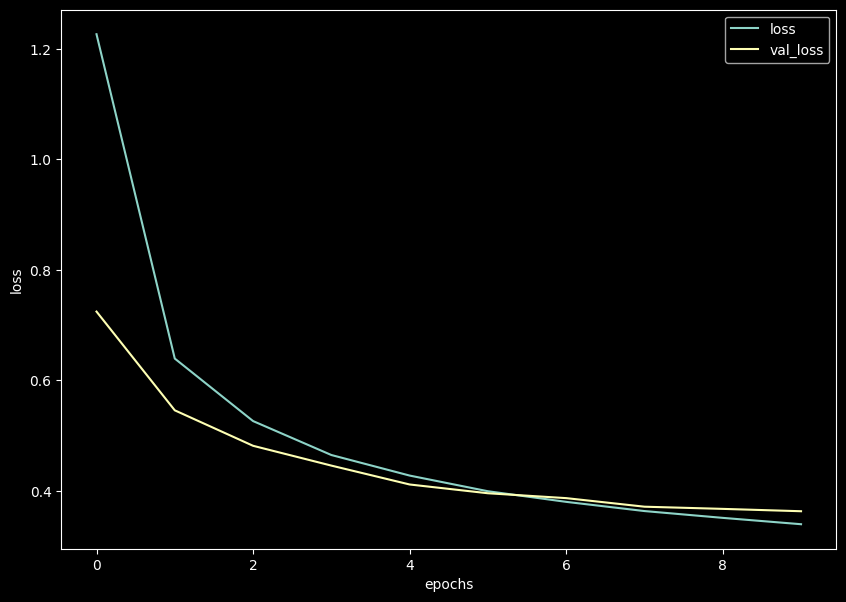

In [46]:
fig, ax = plt.subplots(figsize = (10,7))
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()




# Wrap-up


In this coding session, we've gained insights into the following:

* Implementing the RNN layer from scratch using Numpy, facilitating a deeper understanding of data transformations.
* Conducting a classification task on data with dimensions (N, T, D) by leveraging LSTM networks.

